In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# View Measurement Data
connect = engine.connect()
measurement_result = pd.read_sql("select * from measurement", connect)
measurement_result

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [10]:
# View Station Data
station_result = pd.read_sql("select * from station", connect)
station_result

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set. 
# select (station, date, prcp, tobs, id)
# from (measurement_result)
# WHERE date = max(date)
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23)-dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

Text(0, 0.5, 'Percipitation')

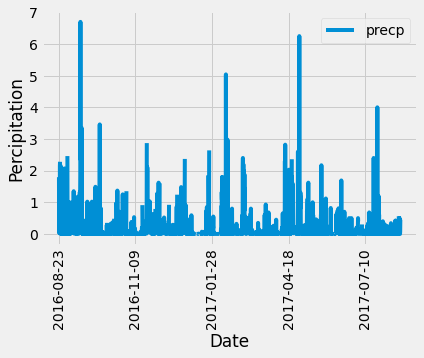

In [13]:
# Perform a query to retrieve the data and precipitation scores
Precip_DF = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
Precip_DF
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(Precip_DF,columns = ['date', 'precp'])

# Sort the dataframe by date
df = df.set_index ('date')
df = df.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

# df.plot.bar()
# plt.tight_layout()
# plt.show()

df.plot()
plt.xticks(rotation =90)
plt.xlabel('Date')
plt.ylabel('Percipitation')


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.agg(
    {
        "precp":["min", "max", "median", "mean"],
    }
)


,precp
min,0.000000
max,6.700000
median,0.020000
mean,0.177279


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
total_number_stations= session.query(measurement_result.station).count()
total_number_stations
#session.query(measurement_result.station).count()

ArgumentError: Column expression or FROM clause expected, got 0        USC00519397
1        USC00519397
2        USC00519397
3        USC00519397
4        USC00519397
            ...     
19545    USC00516128
19546    USC00516128
19547    USC00516128
19548    USC00516128
19549    USC00516128
Name: station, Length: 19550, dtype: object.

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query()

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()